<a href="https://colab.research.google.com/github/ravishaaaan/vision_assignment_1/blob/main/Assignment_1_4277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Install and Import Libraries***

In [1]:

!pip install opencv-python matplotlib


***Import Required Modules***

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [3]:

uploaded = files.upload()


Saving sharon-pittaway-iMdsjoiftZo-unsplash.jpg to sharon-pittaway-iMdsjoiftZo-unsplash.jpg


***Upload an Image***

***Load and Display the Image***

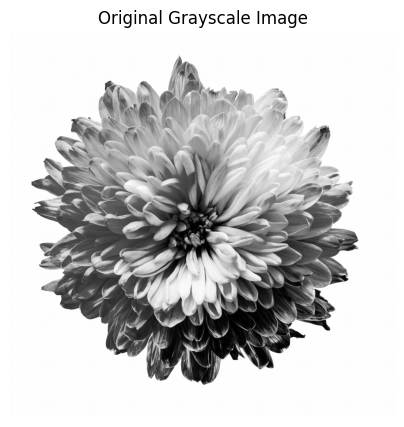

In [4]:
# Load uploaded image in grayscale
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Display utility
def show_image(img, title="Image", cmap='gray'):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show the original image
show_image(img, "Original Grayscale Image")


# **Intensity Level Reduction**

***Reduce Intensity Levels***

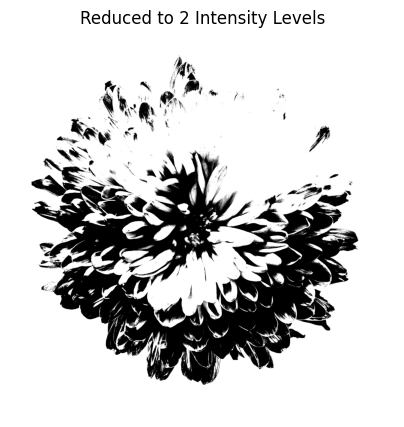

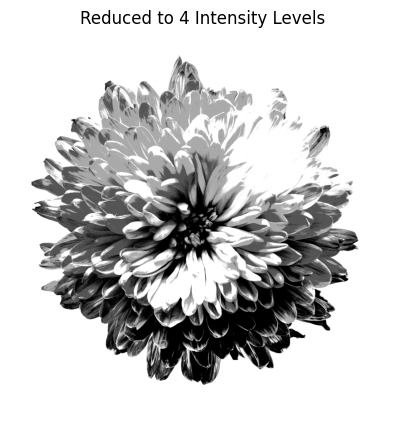

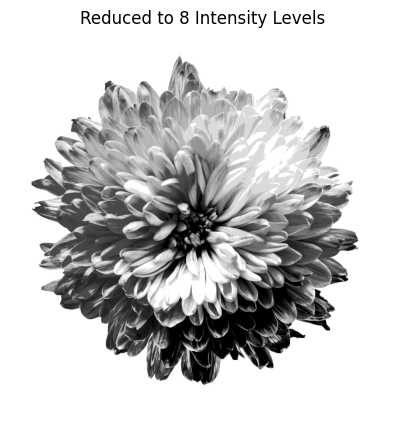

In [5]:
# Function to reduce intensity levels to any power of 2 (2, 4, 8, etc.)
def reduce_intensity_levels(image, levels=2):
    factor = 256 // levels
    reduced = (image // factor) * factor
    return reduced

# Try with different levels
for level in [2, 4, 8]:
    reduced_img = reduce_intensity_levels(img, level)
    show_image(reduced_img, f"Reduced to {level} Intensity Levels")


# **Spatial Averaging with 3x3, 10x10, 20x20 Kernels**

***Spatial Averaging***

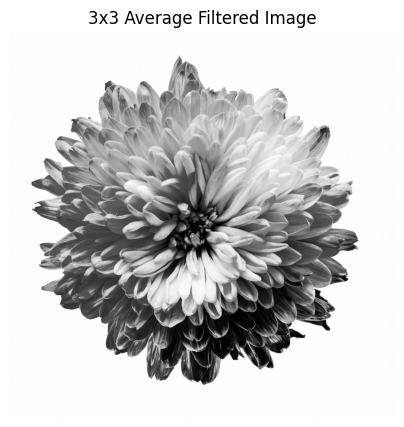

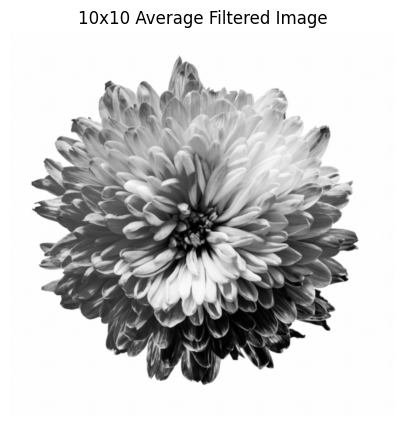

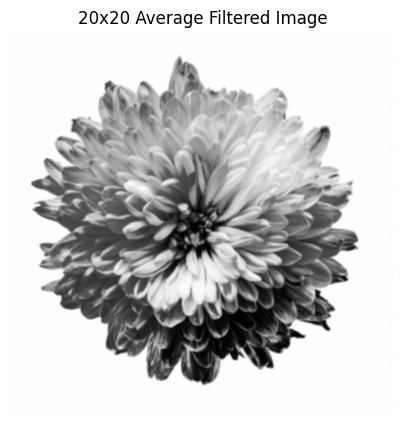

In [6]:
# Function to apply average filter (blurring)
def average_filter(image, ksize):
    return cv2.blur(image, (ksize, ksize))

# Apply different kernel sizes
for size in [3, 10, 20]:
    blurred = average_filter(img, size)
    show_image(blurred, f"{size}x{size} Average Filtered Image")


# **Rotate Image by 45° and 90°**

***Image Rotation***

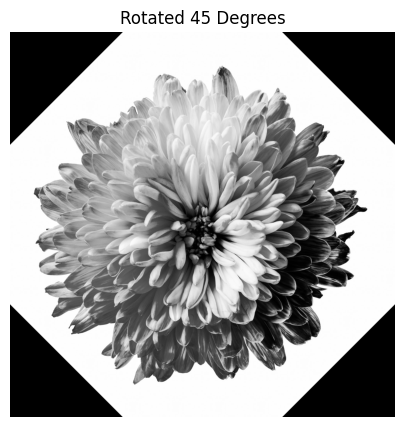

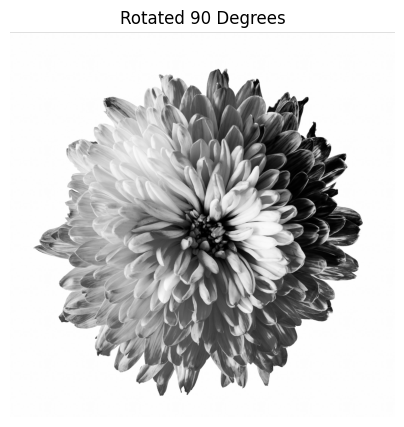

In [7]:
# Function to rotate image around its center
def rotate_image(image, angle):
    h, w = image.shape
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))
    return rotated

# Rotate by 45° and 90°
rot_45 = rotate_image(img, 45)
rot_90 = rotate_image(img, 90)

show_image(rot_45, "Rotated 45 Degrees")
show_image(rot_90, "Rotated 90 Degrees")


# **Block-wise Resolution Reduction**

***Block-wise Averaging***

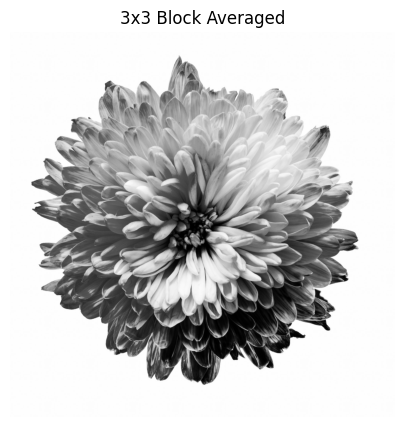

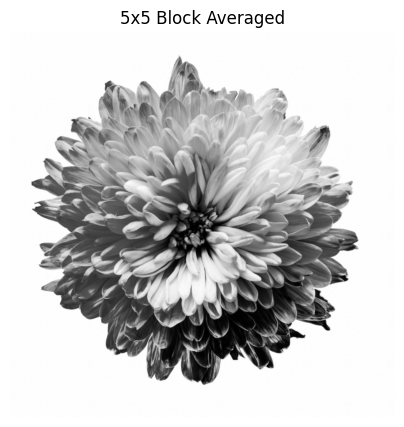

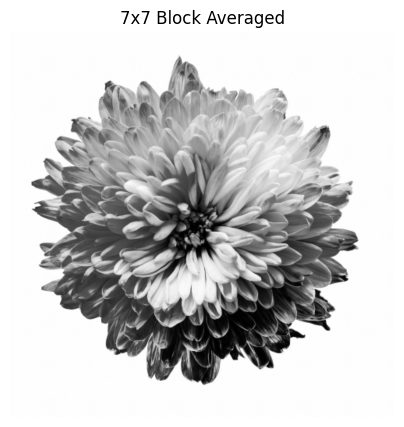

In [8]:
# Function for non-overlapping block-wise averaging
def blockwise_average(image, block_size):
    h, w = image.shape
    new_img = np.copy(image)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            avg = np.mean(block)
            new_img[i:i+block_size, j:j+block_size] = avg
    return new_img.astype(np.uint8)

# Apply for block sizes 3x3, 5x5, 7x7
for size in [3, 5, 7]:
    block_img = blockwise_average(img, size)
    show_image(block_img, f"{size}x{size} Block Averaged")
